In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
m1,cov1=[1,5],[[1,.1],[.1,1]]
m2,cov2=[4,6],[[1,0.1],[.1,1.2]]
dist1=np.random.multivariate_normal(m1,cov1,500)
dist2=np.random.multivariate_normal(m2,cov2,500)

               

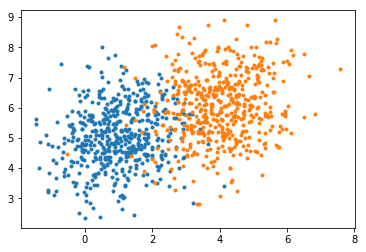

In [3]:
plt.plot(dist1[:,0],dist1[:,1],'.')
plt.plot(dist2[:,0],dist2[:,1],'.')plt.

In [4]:
data=np.zeros((1000,3))
data[:500,:2]=dist1
data[500:,:2]=dist2
data[500:,-1]=1
print(data.shape)

(1000, 3)


In [5]:
np.random.shuffle(data)
data[:10]

array([[-0.5401456 ,  4.46231677,  1.        ],
       [ 4.83136301,  6.97124094,  1.        ],
       [ 1.36821706,  5.00612886,  0.        ],
       [ 1.32391969,  4.44314863,  0.        ],
       [ 4.45705359,  4.96866616,  1.        ],
       [ 0.83279794,  5.24913407,  0.        ],
       [ 4.21566465,  5.76281314,  1.        ],
       [ 3.32096154,  6.44714868,  1.        ],
       [ 5.8394961 ,  5.7790121 ,  1.        ],
       [ 5.29722578,  7.2328686 ,  1.        ]])

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[:,:2],data[:,-1])

In [10]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(750, 2) (750,)
(250, 2) (250,)


In [13]:
def sigmoid(x):
    return 1/(1+np.exp(-1*x))    
def hypothesis(X,W,b):    #b is the value of thetha(0)
    h=(X*W).sum()+b
    return sigmoid(h)
def log_likelihood(X,W,b,y_true):   #binary cross entropy
    total=0.0
    m=X.shape[0]
    for i in range(m):
        if y_true[i]==0:
            total+=np.log(1-hypothesis(X[i],W,b))
        else: 
            total+=np.log(hypothesis(X[i],W,b))
    total/=m
    return total

In [32]:
def gradient_ascend(X,W,b,y_true,learning_rate=0.1):
    gradW=np.zeros(2)   #vector
    gradB=0.0
    m=X.shape[0]
    for i in range(m):
        gradW+=(y_true[i]-hypothesis(X[i],W,b))*X[i]    #X[i] contains two features thus gets vectorized
        gradB+=(y_true[i]-hypothesis(X[i],W,b))
    gradW/=m
    gradB/=m
    W+=learning_rate*gradW
    b+=learning_rate*gradB
    logs=log_likelihood(X,W,b,y_true)
    return W,b,logs

In [37]:
w=np.array([2.5,0.5])
b=4.2
logs_list=[]
for i in range(600):
    w,b,logs=gradient_ascend(X_train,w,b,y_train)
    logs_list.append(logs)

In [38]:
w

array([ 2.78828016, -1.47168602])

In [39]:
b

1.7757398916938578

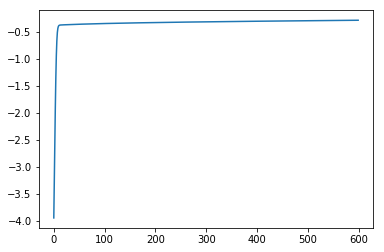

In [40]:
plt.plot(logs_list)

In [53]:
def predict(x_sample,W,b):
    confidence=hypothesis(x_sample,W,b)
    if confidence>0.5:
        return 1
    else :
        return 0

In [58]:
def score(x_test,y_test,W,b):
    pred=[]
    m=x_test.shape[0]
    for i in range(m):
        p=predict(x_test[i],W,b)
        pred.append(p)
    pred=np.asarray(pred)
    return 100*(pred==y_test).sum()/m


In [59]:
score(X_test,y_test,w,b)

86.0

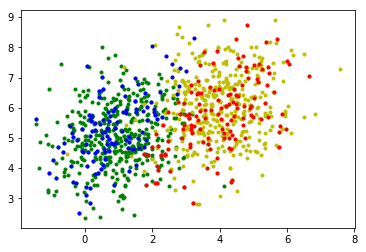

In [65]:
plt.plot(dist1[:,0],dist1[:,1],'.',color='g')
plt.plot(dist2[:,0],dist2[:,1],'.',color='y')
m=X_test.shape[0]
for i in range(m):
    x=X_test[i]
    p=predict(x,w,b)
    if p==0:
        plt.plot(x[0],x[1],'b.')
    else:
        plt.plot(x[0],x[1],'r.')